In [3]:
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer
df= pd.read_csv('/Users/loay/Desktop/Data for projects/Suicide/master.csv')

In [7]:
df.head

<bound method NDFrame.head of           country  year     sex          age  suicides_no  population  \
0         Albania  1987    male  15-24 years           21      312900   
1         Albania  1987    male  35-54 years           16      308000   
2         Albania  1987  female  15-24 years           14      289700   
3         Albania  1987    male    75+ years            1       21800   
4         Albania  1987    male  25-34 years            9      274300   
...           ...   ...     ...          ...          ...         ...   
27815  Uzbekistan  2014  female  35-54 years          107     3620833   
27816  Uzbekistan  2014  female    75+ years            9      348465   
27817  Uzbekistan  2014    male   5-14 years           60     2762158   
27818  Uzbekistan  2014  female   5-14 years           44     2631600   
27819  Uzbekistan  2014  female  55-74 years           21     1438935   

       suicides/100k pop    country-year  HDI for year  gdp_for_year ($)   \
0               

In [4]:
import os
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
df.head()

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers


In [6]:
unique_country = df['country'].unique()
print(unique_country)

['Albania' 'Antigua and Barbuda' 'Argentina' 'Armenia' 'Aruba' 'Australia'
 'Austria' 'Azerbaijan' 'Bahamas' 'Bahrain' 'Barbados' 'Belarus' 'Belgium'
 'Belize' 'Bosnia and Herzegovina' 'Brazil' 'Bulgaria' 'Cabo Verde'
 'Canada' 'Chile' 'Colombia' 'Costa Rica' 'Croatia' 'Cuba' 'Cyprus'
 'Czech Republic' 'Denmark' 'Dominica' 'Ecuador' 'El Salvador' 'Estonia'
 'Fiji' 'Finland' 'France' 'Georgia' 'Germany' 'Greece' 'Grenada'
 'Guatemala' 'Guyana' 'Hungary' 'Iceland' 'Ireland' 'Israel' 'Italy'
 'Jamaica' 'Japan' 'Kazakhstan' 'Kiribati' 'Kuwait' 'Kyrgyzstan' 'Latvia'
 'Lithuania' 'Luxembourg' 'Macau' 'Maldives' 'Malta' 'Mauritius' 'Mexico'
 'Mongolia' 'Montenegro' 'Netherlands' 'New Zealand' 'Nicaragua' 'Norway'
 'Oman' 'Panama' 'Paraguay' 'Philippines' 'Poland' 'Portugal'
 'Puerto Rico' 'Qatar' 'Republic of Korea' 'Romania' 'Russian Federation'
 'Saint Kitts and Nevis' 'Saint Lucia' 'Saint Vincent and Grenadines'
 'San Marino' 'Serbia' 'Seychelles' 'Singapore' 'Slovakia' 'Slovenia'
 'South 

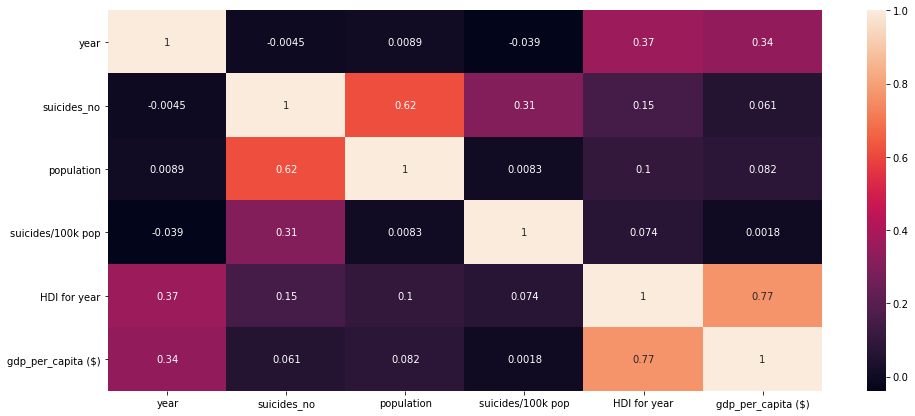

In [11]:
plt.figure(figsize=(16,7))
cor = sns.heatmap(df.corr(), annot = True)

In [13]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [14]:
df[['suicides_no','population','suicides/100k pop','gdp_per_capita ($)']].describe()

,suicides_no,population,suicides/100k pop,gdp_per_capita ($)
count,27820.000000,2.782000e+04,27820.000000,27820.000000
mean,242.574407,1.844794e+06,12.816097,16866.464414
std,902.047917,3.911779e+06,18.961511,18887.576472
min,0.000000,2.780000e+02,0.000000,251.000000
25%,3.000000,9.749850e+04,0.920000,3447.000000
50%,25.000000,4.301500e+05,5.990000,9372.000000
75%,131.000000,1.486143e+06,16.620000,24874.000000
max,22338.000000,4.380521e+07,224.970000,126352.000000


Text(0, 0.5, 'suicides_no')

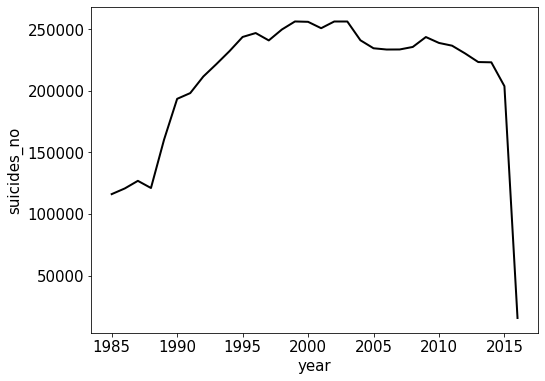

In [23]:
ns = df['suicides_no'].groupby(df.year).sum()
ns.plot(figsize=(8,6), linewidth=2, fontsize=15,color='black')
plt.xlabel('year', fontsize=15)
plt.ylabel('suicides_no',fontsize=15)

ConversionError: Failed to convert value(s) to axis units: '1985'

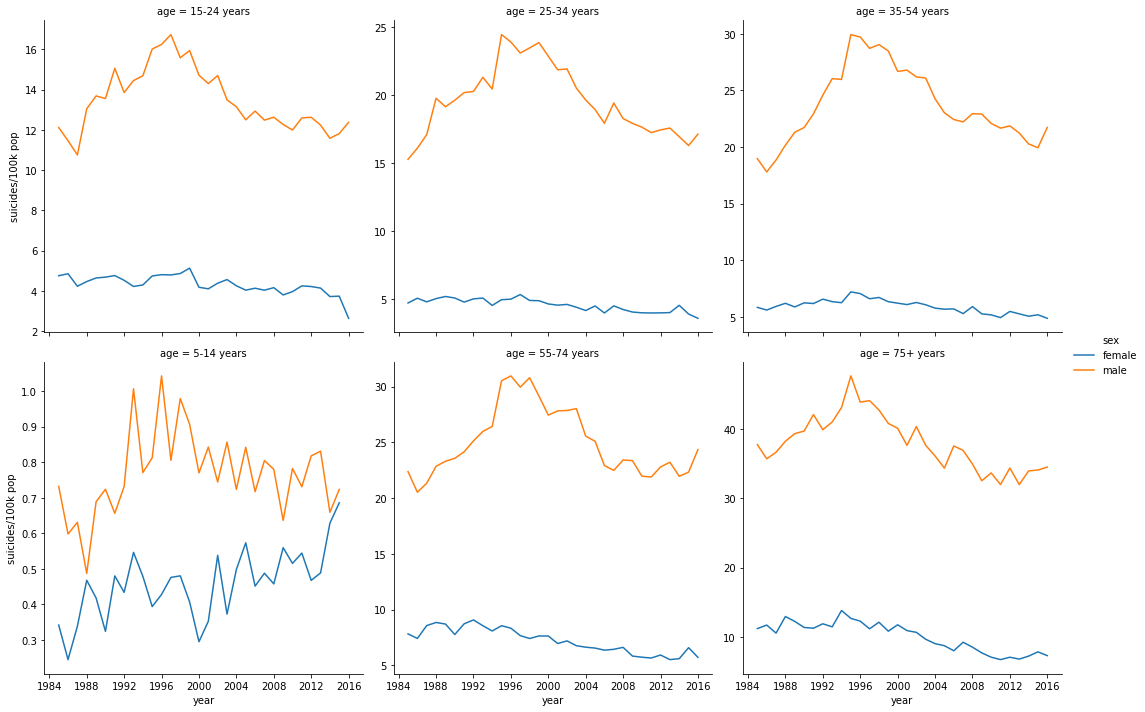

In [25]:
df = df.groupby(["year", "sex", "age"]).agg("mean").reset_index()

sns.relplot(x = "year", y = "suicides/100k pop", 
            hue = "sex", col = "age", col_wrap = 3, data = df, 
            facet_kws=dict(sharey=False), kind = "line")

plt.xlim("1985", "2015")
plt.subplots_adjust(top = 0.9)
plt.suptitle("Evolution of suicide by sex and age category (1985 - 2015)", size=15);

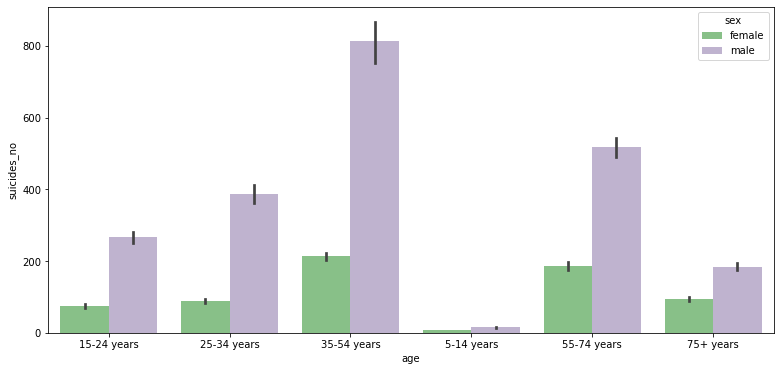

In [29]:

## Suicides number by age and sex
f,ax = plt.subplots(1,1,figsize=(13,6))
ax = sns.barplot(x = df['age'], y = 'suicides_no',
                  hue='sex',data=df, palette='Accent')

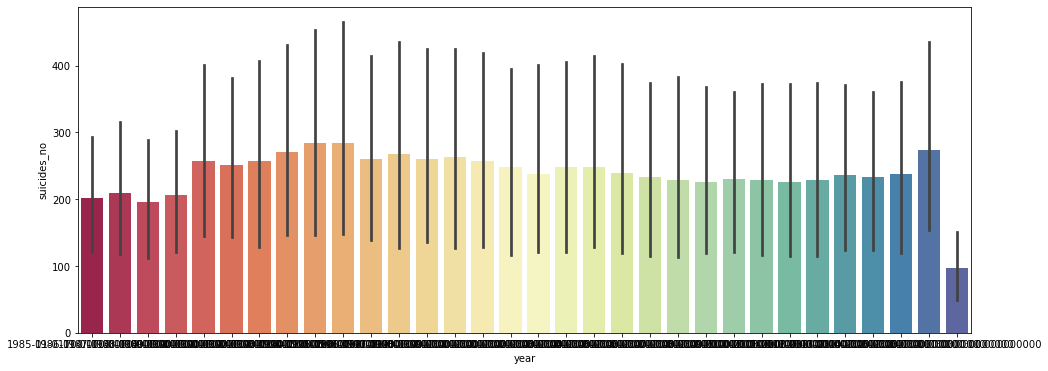

In [30]:
f,ax = plt.subplots(1,1,figsize=(16,6))
ax = sns.barplot(x = df['year'], y = 'suicides_no',
                data=df, palette='Spectral')

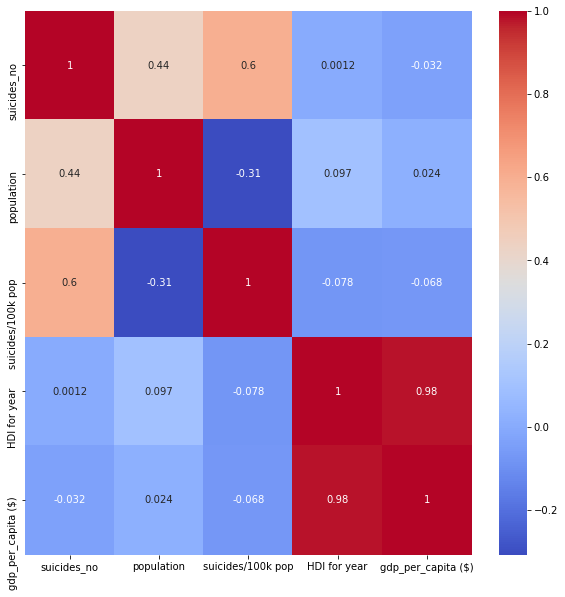

In [31]:
f,ax = plt.subplots(1,1,figsize=(10,10))
ax = sns.heatmap(df.corr(),annot=True, cmap='coolwarm')

In [33]:
age_grp = df.groupby('age')[['suicides_no']].sum().reset_index()
age_grp.sort_values(by='suicides_no', ascending=False).style.background_gradient(cmap='Greys', subset=['suicides_no'])

,age,suicides_no
2,35-54 years,32909.394916
4,55-74 years,22527.952869
1,25-34 years,15291.135361
0,15-24 years,10966.768155
5,75+ years,8938.023322
3,5-14 years,701.268153


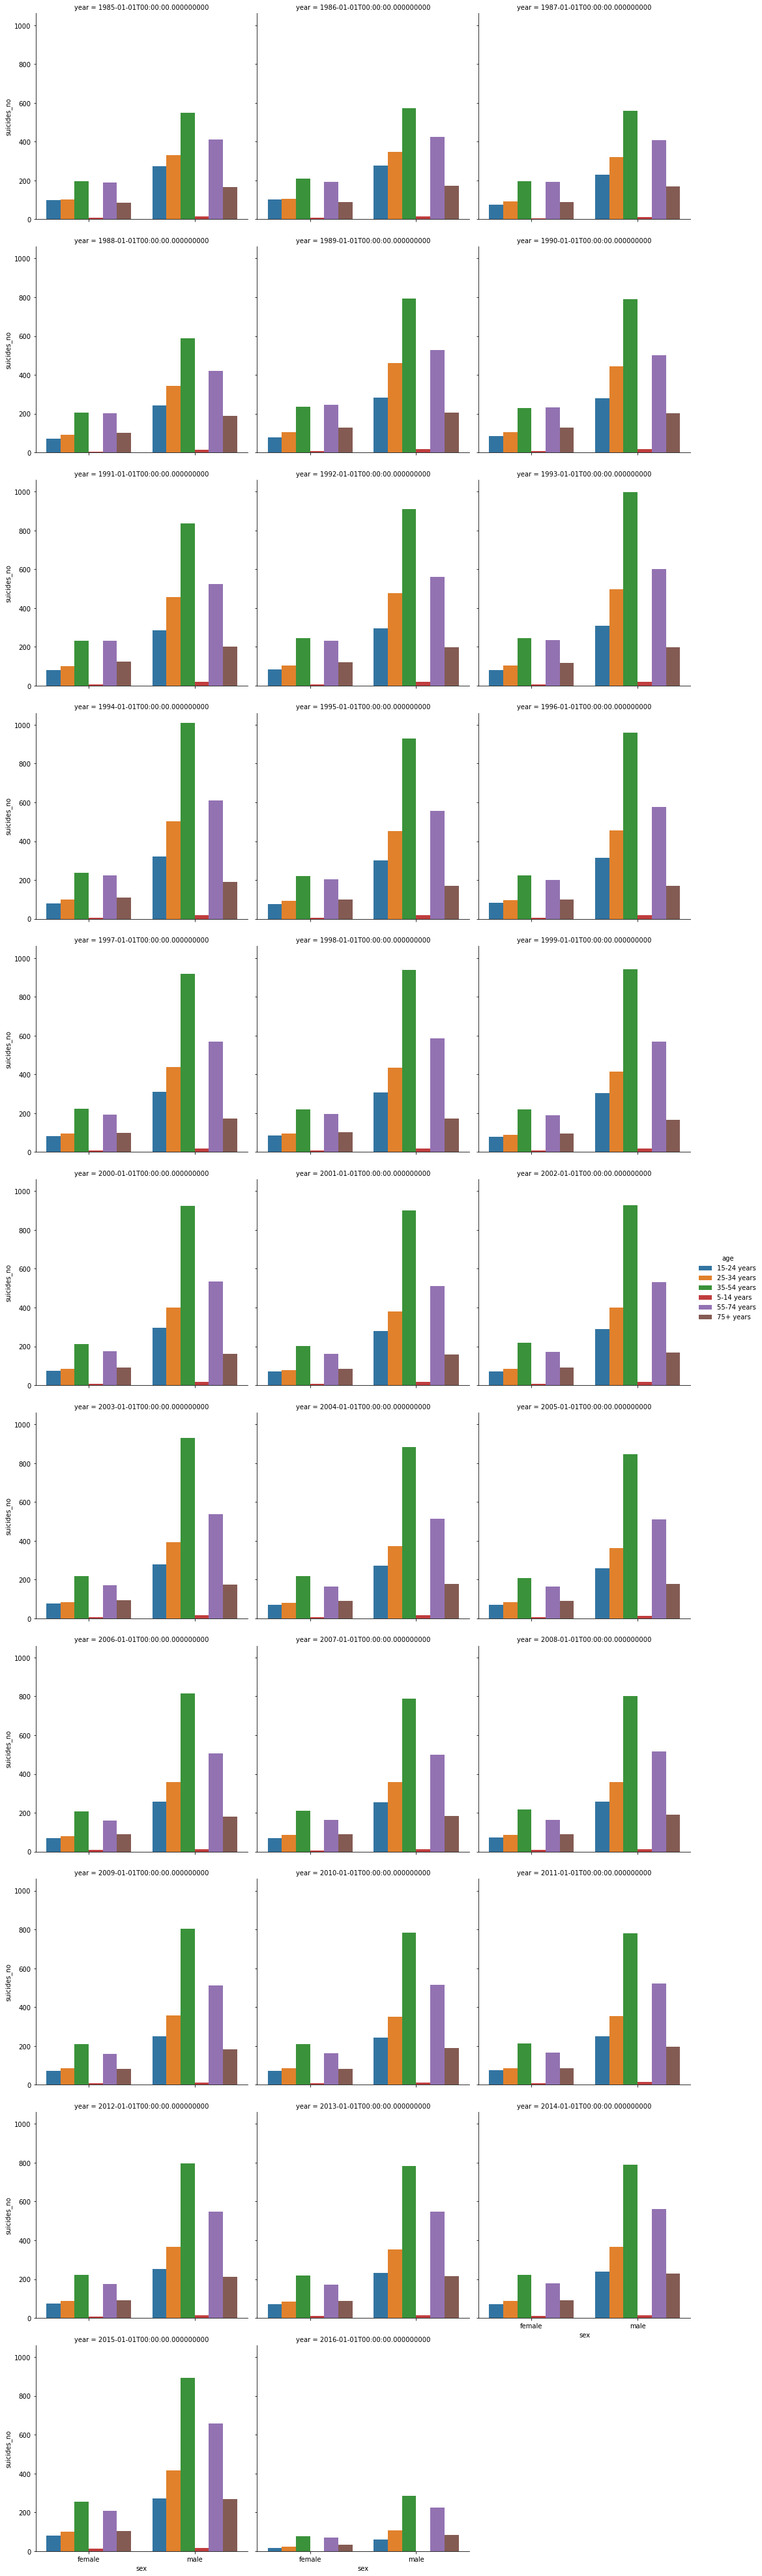

In [39]:
cat_accord_year = sns.catplot('sex','suicides_no',hue='age',col='year',data=df,kind='bar',col_wrap=3)

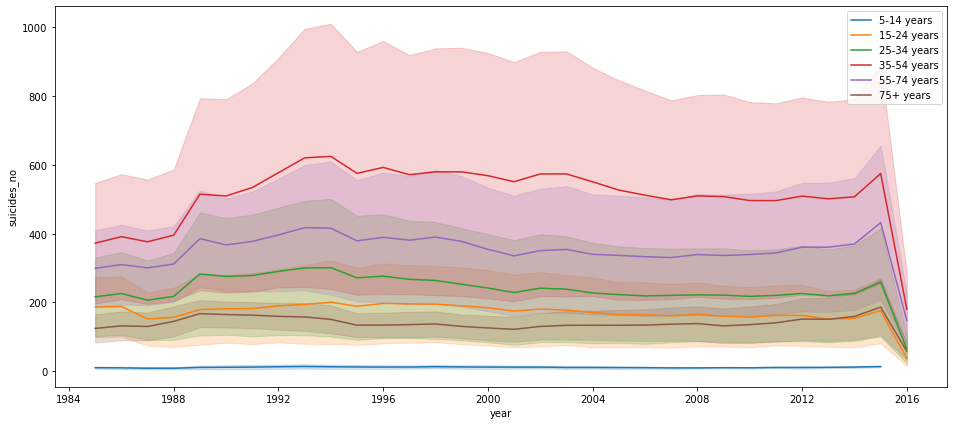

In [41]:
###we store a range of age group in variables so we can do easily lineplot
age_5 = df.loc[df.loc[:, 'age']=='5-14 years',:]
age_15 = df.loc[df.loc[:, 'age']=='15-24 years',:]
age_25 = df.loc[df.loc[:, 'age']=='25-34 years',:]
age_35 = df.loc[df.loc[:, 'age']=='35-54 years',:]
age_55 = df.loc[df.loc[:, 'age']=='55-74 years',:]
age_75 = df.loc[df.loc[:, 'age']=='75+ years',:]

### Set figure size
plt.figure(figsize=(16,7))
####Now lets plot a line plot
age_5_lp = sns.lineplot(x='year', y='suicides_no', data=age_5)
age_15_lp = sns.lineplot(x='year', y='suicides_no', data=age_15)
age_25_lp = sns.lineplot(x='year', y='suicides_no', data=age_25)
age_35_lp = sns.lineplot(x='year', y='suicides_no', data=age_35)
age_55_lp = sns.lineplot(x='year', y='suicides_no', data=age_55)
age_75_lp = sns.lineplot(x='year', y='suicides_no', data=age_75)

##Now make the legend
leg = plt.legend(['5-14 years', '15-24 years', '25-34 years', '35-54 years', '55-74 years', '75+ years'])


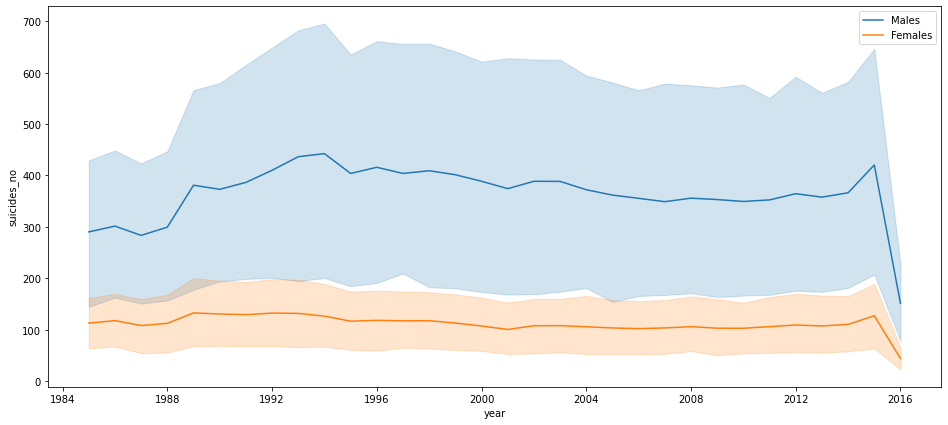

In [43]:
###Now create a varible that stores a 'male' & 'female' data so we can easily plot a Lineplot
male_population = df.loc[df.loc[:, 'sex']=='male',:]
female_population = df.loc[df.loc[:, 'sex']=='female',:]

### Set figure size
plt.figure(figsize=(16,7))

##Plot the Lineplot
lp_male = sns.lineplot(x = 'year' , y = 'suicides_no' , data = male_population)
lp_female = sns.lineplot(x = 'year' , y = 'suicides_no' , data = female_population)
leg1 = plt.legend(['Males','Females'])

In [ ]:
# further analysis 

suic_sum_m = df['suicides_no'].groupby([df['country'],df['sex']]).sum()
suic_sum_m = suic_sum_m.reset_index().sort_index(by='suicides_no',ascending=False)
most_cont_m = suic_sum_m.head(10)
most_cont_m.head(10)
fig = plt.figure(figsize=(20,5))
plt.title('Count of suicides for 31 years.')
sns.set(font_scale=1.5)
sns.barplot(y='suicides_no',x='country',hue='sex',data=most_cont_m,palette='Set2');
plt.ylabel('Count of suicides')
plt.tight_layout()




suic_mean = pd.DataFrame(df['suicides/100k pop'].groupby(df['country']).mean())
suic_mean = suic_mean.reset_index()
suic_mean_most = suic_mean.sort_index(by='suicides/100k pop',ascending=False).head(8)

fig = plt.figure(figsize=(15,5))
plt.title('suicides/100k pop.')
#sns.set(font_scale=1.5)
sns.barplot(y='suicides/100k pop',x='country',data=suic_mean_most,palette="GnBu_d");
plt.ylabel('suicides/100k pop')
plt.tight_layout()


df["year"] = pd.to_datetime(df["year"], format = "%Y")
data = df.groupby(["year", "sex"]).agg("mean").reset_index()
sns.lineplot(x = "year", y = "suicides/100k pop", hue = "sex", data = df)
plt.xlim("1985", "2015")
plt.title("Evolution of the mean suicides number per 100k population (1985 - 2015)");

df = df.groupby(["year", "sex", "age"]).agg("mean").reset_index()

sns.relplot(x = "year", y = "suicides/100k pop", 
            hue = "sex", col = "age", col_wrap = 3, data = df, 
            facet_kws=dict(sharey=False), kind = "line")


plt.xlim("1985", "2015")
plt.subplots_adjust(top = 0.9)
plt.suptitle("Evolution of suicide by sex and age category (1985 - 2015)", size=15);


year_2016 = df[(df['year'] == 2016)]
year_2016 = year_2016.groupby('country')[['suicides_no']].sum().reset_index()

# Sort values in ascending order
year_2016 = year_2016.sort_values(by='suicides_no', ascending=False)

# Styling output dataframe
year_2016.style.background_gradient(cmap='Oranges', subset=['suicides_no'])



## Suicides number by generation and sex
f,ax = plt.subplots(1,1,figsize=(13,6))
ax = sns.barplot(x = df['generation'], y = 'suicides_no',
                  hue='sex',data=df, palette='autumn')


data = df['suicides_no'].groupby(df.country).sum().sort_values(ascending=False)
f,ax = plt.subplots(1,1,figsize=(10,20))
ax = sns.barplot(data.head(20), data.head(20).index, palette='Reds_r')


per100k = df.groupby(['country', 'year'])[['suicides/100k pop']].sum().reset_index()
per100k.sort_values(by='suicides/100k pop', ascending=False).head(20).style.background_gradient(cmap='Reds', subset=['suicides/100k pop'])



df.fillna(df.mean(), inplace=True)

## We don't need the column "country-year", so we'll just drop it
df.drop("country-year", axis=1, inplace=True)
df.head()


## Checking the relationship between gdp for year and number of suicides
f, ax = plt.subplots(1,1, figsize=(10,8))
ax = sns.scatterplot(x="gdp_for_year", y="suicides_no", data=df, color='purple')


from sklearn.datasets.samples_generator import make_blobs
from sklearn.cluster import KMeans
from mpl_toolkits.mplot3d import Axes3D
x = df.drop('suicides_no', axis=True)
y = df['suicides_no']
kmeans = KMeans(n_clusters=2)
kmeans.fit(x)
KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=600,
    n_clusters=2, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=0, tol=0.0001, verbose=0)
y_kmeans = kmeans.predict(x)
x, y_kmeans = make_blobs(n_samples=600, centers=2, cluster_std=0.60, random_state=0)
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(x[:,0], x[:,1], c=y_kmeans, cmap='cool')


